In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv')


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,19219.0,9.609000e+03,5.548192e+03,0.0000,4804.50000,9.609000e+03,1.441350e+04,1.921800e+04
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02


In [5]:
data.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


THERE ARE 7 BINARY COLUMNS AND EACH ONE OF THEM IS A TARGET

the range between the inuts is varies too much, as some features go up to 12million

some of the features have negative values, therefore i would like to scale the data

In [6]:
labels = data.columns[28:]
print(labels)
scaled_data = data.drop(labels=labels,axis=1)


Index(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'],
      dtype='object')


In [7]:
#using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
DataScaled = scaler.fit_transform(scaled_data)
print(DataScaled)

[[-1.73196069 -0.23677796 -0.32783094 ... -1.23596906  1.06349391
  -1.29497069]
 [-1.73178044  0.1846467   0.12432858 ...  1.31064143 -1.34051058
   1.13541985]
 [-1.7316002  -1.2621192  -1.12411187 ... -0.23221205  0.36547671
   1.2886362 ]
 ...
 [ 1.7316002  -1.32420409 -1.44622551 ...  1.37215871 -2.40914168
   1.28773316]
 [ 1.73178044 -1.31856001 -1.47223469 ...  1.75992266  0.18432462
  -0.66524849]
 [ 1.73196069  1.49595467  1.54282903 ...  0.86853722  0.21922548
   0.2709064 ]]


In [8]:
scaled_df = pd.DataFrame(DataScaled,columns=scaled_data.columns)
scaled_df

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-1.731961,-0.236778,-0.327831,-0.493713,-0.493938,-0.447155,-0.492949,-0.585088,-0.428885,0.978888,...,-0.522389,1.732355,0.761892,-1.227910,-1.669010,-0.875450,-1.703257,-1.235969,1.063494,-1.294971
1,-1.731780,0.184647,0.124329,-0.589127,-0.589709,-0.335365,-0.425464,-0.100187,-0.333403,-0.514188,...,-0.554101,-1.640168,0.761892,0.846618,0.214350,-1.142425,0.844958,1.310641,-1.340511,1.135420
2,-1.731600,-1.262119,-1.124112,0.190344,0.192770,2.601456,3.426816,3.521726,2.532830,-1.937820,...,1.629799,-1.701772,-2.018246,-1.227910,2.081276,1.851790,2.021418,-0.232212,0.365477,1.288636
3,-1.731420,0.133850,0.070310,0.789801,0.794500,-0.395147,-0.447959,-0.347586,-0.426785,1.013611,...,-0.554101,-1.078081,0.449619,0.846618,-0.198900,-1.142425,0.102736,1.156438,0.815864,-0.509925
4,-1.731240,1.561802,1.612854,-0.646859,-0.647650,-0.311774,-0.133028,0.028460,-0.324913,-0.097516,...,-0.241209,-1.817787,0.698985,0.846618,0.389091,0.218738,1.210891,1.667237,-0.890123,1.288034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,1.731240,0.073646,0.006287,-0.896529,-0.898294,-0.446887,-0.515444,-0.594984,-0.429068,1.291393,...,-0.554101,1.732355,-0.143248,-1.227910,-1.634299,-1.142425,-1.942198,-0.503708,1.186478,-0.848265
19215,1.731420,0.024731,-0.037729,0.335577,0.338530,-0.389518,-0.442336,-0.377274,-0.372640,0.666384,...,-0.509704,0.533086,0.407077,0.846618,-0.144466,-0.579834,0.062296,1.270245,0.328083,-0.102653
19216,1.731600,-1.324204,-1.446226,-0.142737,-0.141583,-0.242341,0.103170,0.335234,-0.273147,-1.521147,...,-0.226410,-1.927057,0.560046,0.846618,0.550421,0.253793,1.182287,1.372159,-2.409142,1.287733
19217,1.731780,-1.318560,-1.472235,-0.071754,-0.070361,-0.417666,-0.464831,-0.377274,-0.400528,0.110820,...,-0.503361,0.694517,0.761892,0.846618,-0.490529,-0.579834,0.062296,1.759923,0.184325,-0.665248


In [9]:
scaled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,19219.0,0.000000e+00,1.000026,-1.731961,-0.865980,0.000000,0.865980,1.731961
X_Minimum,19219.0,1.293980e-18,1.000026,-1.335492,-1.243306,0.126325,0.831835,1.872227
X_Maximum,19219.0,1.090640e-17,1.000026,-1.500245,-1.080096,0.084314,0.822575,1.918962
Y_Minimum,19219.0,-2.735843e-17,1.000026,-0.968237,-0.626365,-0.237240,0.272275,5.851263
Y_Maximum,19219.0,1.330951e-17,1.000026,-0.970276,-0.627083,-0.236481,0.272067,5.875339
Pixels_Areas,19219.0,-1.534290e-17,1.000026,-0.449836,-0.427585,-0.406407,-0.276388,40.472385
X_Perimeter,19219.0,-2.514018e-17,1.000026,-0.526692,-0.453583,-0.397345,-0.178018,41.938373
Y_Perimeter,19219.0,-2.495532e-17,1.000026,-0.624672,-0.496025,-0.406962,-0.030916,8.301465
Sum_of_Luminosity,19219.0,1.996426e-17,1.000026,-0.433464,-0.411749,-0.392768,-0.280238,25.790106
Minimum_of_Luminosity,19219.0,-8.059645e-17,1.000026,-2.944778,-0.514188,0.180266,0.701106,3.860873


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


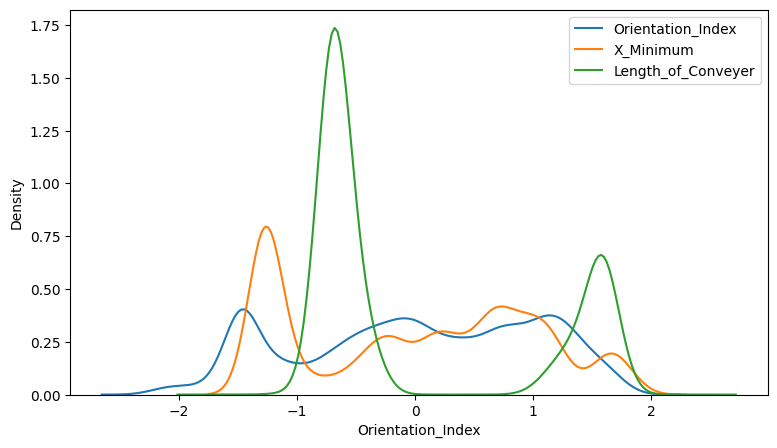

In [10]:
plt.figure(figsize=(9,5))
sns.kdeplot(data=scaled_df,x="Orientation_Index",label="Orientation_Index")
sns.kdeplot(data=scaled_df,x="X_Minimum", label="X_Minimum")
sns.kdeplot(data=scaled_df,x="Length_of_Conveyer", label="Length_of_Conveyer")
plt.legend()
plt.show()
